In [148]:
import os
os.getcwd()

'C:\\Users\\Hiba\\Desktop\\data set'

In [149]:
os.chdir('C:/Users/Hiba/Desktop/data set')

In [150]:
os.getcwd()

'C:\\Users\\Hiba\\Desktop\\data set'

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sales=pd.read_csv('sales.csv')
sales

,Sales Executive,Name,Gender,Age,Location,Sales in Rs
0,1,Mahesh,Male,25,Hyderabad,50
1,2,Suresh,Male,22,Hyderabad,75
2,3,Vijay,Male,20,Bangalore,11
3,4,Ramesh,Male,27,Bangalore,77
4,5,Jagadish,Male,28,Mumbai,45
5,6,Harish,Male,24,Hyderabad,52
6,7,Karan,Male,24,Bangalore,26
7,8,Raju,Male,23,Mumbai,24
8,9,Maya,Female,24,Mumbai,28
9,10,Rani,Female,30,Mumbai,31


In [152]:
S=sales['Sales in Rs']
S

0     50
1     75
2     11
3     77
4     45
5     52
6     26
7     24
8     28
9     31
10    36
11    72
12    69
13    51
14    34
15    40
16    18
17    35
18    29
19    68
Name: Sales in Rs, dtype: int64

In [153]:
age=sales['Age']
age

0     25
1     22
2     20
3     27
4     28
5     24
6     24
7     23
8     24
9     30
10    19
11    24
12    26
13    26
14    21
15    24
16    29
17    27
18    24
19    25
Name: Age, dtype: int64

Text(0.5,0,'age')

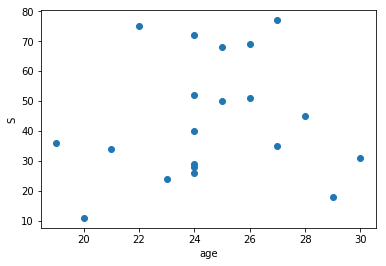

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(age,S,'o')
plt.ylabel("S")
plt.xlabel("age")

In [155]:
sales.corr()

,Sales Executive,Age,Sales in Rs
Sales Executive,1.000000,0.175677,-0.117357
Age,0.175677,1.000000,0.118371
Sales in Rs,-0.117357,0.118371,1.000000


In [156]:
mean_sales=sales['Sales in Rs'].mean()
mean_sales

43.55

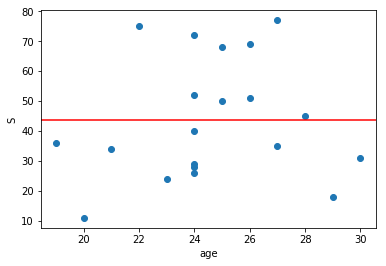

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(age,S,'o')
plt.ylabel("S")
plt.xlabel("age")
plt.axhline(mean_sales,color='r',linestyle='-')
plt.show()

In [158]:
import statsmodels.api as sm
model=sm.OLS(S,age).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales in Rs   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     94.68
Date:                Wed, 22 May 2019   Prob (F-statistic):           8.16e-09
Time:                        00:19:53   Log-Likelihood:                -87.790
No. Observations:                  20   AIC:                             177.6
Df Residuals:                      19   BIC:                             178.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            1.7586      0.181      9.730      0.000       1.380       2.137
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.098
Skew:                           0.303   Prob(JB):                        0.577
Kurtosis:                       2.025   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
#split data
X=sales['Age'] #splitting data
y=sales['Sales in Rs']

In [160]:
X

0     25
1     22
2     20
3     27
4     28
5     24
6     24
7     23
8     24
9     30
10    19
11    24
12    26
13    26
14    21
15    24
16    29
17    27
18    24
19    25
Name: Age, dtype: int64

In [161]:
y

0     50
1     75
2     11
3     77
4     45
5     52
6     26
7     24
8     28
9     31
10    36
11    72
12    69
13    51
14    34
15    40
16    18
17    35
18    29
19    68
Name: Sales in Rs, dtype: int64

In [162]:
#Split data into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1) #split the data into training and test set

In [163]:
X_train

7     23
1     22
13    26
0     25
19    25
18    24
9     30
15    24
8     24
12    26
11    24
5     24
Name: Age, dtype: int64

In [164]:
X_test

3     27
16    29
6     24
10    19
2     20
14    21
4     28
17    27
Name: Age, dtype: int64

In [165]:
y_train

7     24
1     75
13    51
0     50
19    68
18    29
9     31
15    40
8     28
12    69
11    72
5     52
Name: Sales in Rs, dtype: int64

In [166]:
y_test

3     77
16    18
6     26
10    36
2     11
14    34
4     45
17    35
Name: Sales in Rs, dtype: int64

In [167]:
X_train=X_train.values.reshape((-1,1))
X_train

array([[23],
       [22],
       [26],
       [25],
       [25],
       [24],
       [30],
       [24],
       [24],
       [26],
       [24],
       [24]], dtype=int64)

In [168]:
from sklearn import  linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

In [169]:
accuracy=model.score(X_train,y_train)
print("Accuracy is",accuracy)

Accuracy is 0.030211091423312686


In [170]:
#print coef
print('intercept',model.intercept_)
print('slope',model.coef_)

intercept 89.21468926553673
slope [-1.62146893]


In [171]:
#rotate
X_test=X_test.values.reshape((-1,1))

In [172]:
X_test

array([[27],
       [29],
       [24],
       [19],
       [20],
       [21],
       [28],
       [27]], dtype=int64)

In [173]:
predictions=model.predict(X_test)
print('predicted sales',predictions,sep='\n')

predicted sales
[45.43502825 42.1920904  50.29943503 58.40677966 56.78531073 55.16384181
 43.81355932 45.43502825]


In [174]:
y_test

3     77
16    18
6     26
10    36
2     11
14    34
4     45
17    35
Name: Sales in Rs, dtype: int64

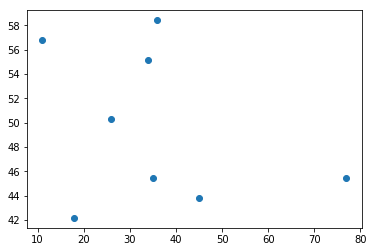

In [175]:
plt.scatter(y_test,predictions)

In [176]:
y_pred=model.intercept_+model.coef_*X_test
print('predicted responsw:',y_pred,sep='\n')

predicted responsw:
[[45.43502825]
 [42.1920904 ]
 [50.29943503]
 [58.40677966]
 [56.78531073]
 [55.16384181]
 [43.81355932]
 [45.43502825]]


In [177]:
#Define new data instance
Xnew=[[24]]
#MAKE a predition
ynew=model.predict(Xnew)

#show inputs nd predicted outputs
print("New age=%s,Predicted sales=%s"%(Xnew,ynew))

New age=[[24]],Predicted sales=[50.29943503]


In [178]:
Xnew=[[30]]
ynew=model.predict(Xnew)
print("New age=%s,Predicted sales=%s"%(Xnew,ynew))

New age=[[30]],Predicted sales=[40.57062147]


In [179]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)

X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)


In [180]:
#model evaluation for training set

import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)

print("The model performance for training set")
print("__________________")
print("RMSE is {}".format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

The model performance for training set
__________________
RMSE is 17.6412779941119
R2 score is 0.030211091423312686




In [181]:
#model evaluation for test set
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)

print("The model performance for testing set")
print("__________________")
print("RMSE is {}".format(rmse_testing))
print('R2 score is {}'.format(r2_testing))
print("\n")

The model performance for testing set
__________________
RMSE is 25.808504731950094
R2 score is -0.8952983574578421




In [182]:
#observation:- test data is failing fr dis model as rmse is increased in testing 

Text(0,0.5,'Sales in Rs')

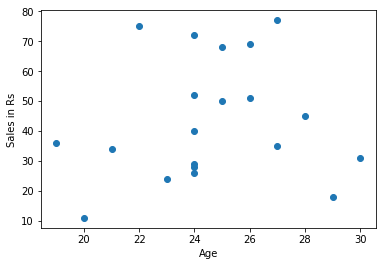

In [183]:
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Sales in Rs')

In [184]:
X=X.reshape(-1,1)
y_predicted=model.predict(X)
y_predicted

C:\Users\Hiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([48.6779661 , 53.54237288, 56.78531073, 45.43502825, 43.81355932,
       50.29943503, 50.29943503, 51.92090395, 50.29943503, 40.57062147,
       58.40677966, 50.29943503, 47.05649718, 47.05649718, 55.16384181,
       50.29943503, 42.1920904 , 45.43502825, 50.29943503, 48.6779661 ])

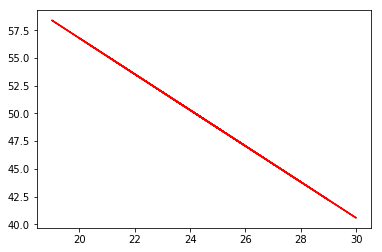

In [185]:
plt.plot(X,y_predicted,color='r')
plt.show()

In [186]:
#bikebuyer.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_csv('bikebuyer1.csv')
data1

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,4.0,Married,NaN,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,15756.0,Single,Female,70000,0.0,High School,Professional,Yes,2,NaN,Pacific,49,Yes
7,11085.0,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
8,17974.0,NaN,Female,0,NaN,Bachelors,Clerical,Yes,0,10.0,Europe,38,Yes
9,21008.0,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes


In [194]:
data1['Region'].value_counts()

North America    3728
Europe           2096
Pacific          1173
Name: Region, dtype: int64